## Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading data from remote link

In [2]:
Data = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(Data)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Columns in dataset
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Bivariate Analysis

In [6]:
corr = df[['Hours','Scores']].corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
import seaborn as sns

### Heatmap to check correlation

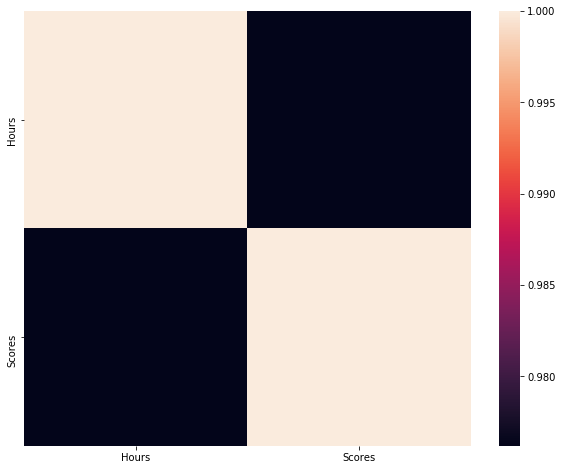

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(corr)

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

Text(0, 0.5, 'Percentage Scores')

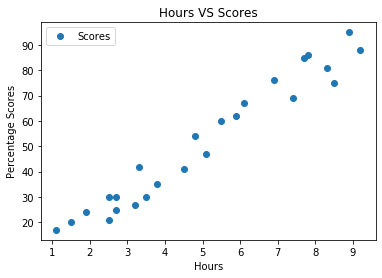

In [9]:
ax = df.plot(x='Hours' , y= 'Scores',style = 'o')
plt.title("Hours VS Scores")
ax.set_xlabel("Hours")
ax.set_ylabel("Percentage Scores")

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data

#### x is a independent variable and y is dependent variable 

In [10]:
x = df.drop('Scores' , axis=1)
y = df['Scores']

### Split our data into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lreg = LinearRegression()

In [15]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Plotting the regression line

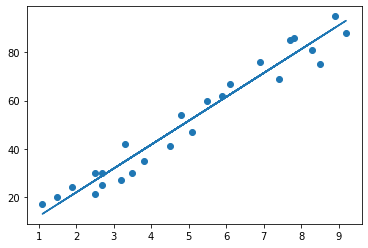

In [16]:
line = lreg.coef_*x+lreg.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions

In [17]:
pred = lreg.predict(X_test)

In [18]:
# Predicting the scores
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
# Comparing Actual vs Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted ': pred})
comparison

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [20]:
# You can also test with your own data
hours = 9.25
hours = np.array(9.25)
hours = hours.reshape(-1,1)
lreg.predict(hours)

array([93.69173249])

### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [21]:
from sklearn import metrics

In [22]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, pred)) 

Mean Absolute Error: 4.183859899002975
